## Code of the FCNN to train with the augmented data set and regularization

In [1]:
import cv2
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D,Input, Conv2DTranspose, ReLU, add
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import layers
import tensorflow.keras.backend as K
import keras

Using TensorFlow backend.


In [2]:
#checking if there are 2 GPUs available 
from tensorflow.python.client import device_lib
#print(device_lib.list_local_devices())#

In [3]:
import tensorflow as tf
#print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


In [4]:
#setting up 2 GPUs
strategy = tf.distribute.MirroredStrategy(cross_device_ops=tf.distribute.HierarchicalCopyAllReduce())

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1')


In [5]:
class Skip_S():
    def __init__(self):
        print("Initial Skipping Structure model...")
        self.model = self.initial_model()

    H = 424
    W = 424
    
    def initial_model(self):
        

        inputs = Input((None, None, 1))
        
        ##flat
        conv1_1 = Conv2D(32, (3, 3), strides = (1,1),  padding='same', name='conv1_1')(inputs)
        bn1_1 = BatchNormalization( name='bn1_1')(conv1_1)
        rel1_1 = ReLU(name='rel1_1')(bn1_1)
        
        conv1_2 = Conv2D(32, (7, 7), strides = (1,1) , padding='same', name='conv1_2')(rel1_1)
        bn1_2 = BatchNormalization(name='bn1_2')(conv1_2)
        rel1_2 = ReLU(name='rel1_2')(bn1_2)
        
        conv1_3 = Conv2D(32, (3, 3), strides = (1,1) , padding='same', name='conv1_3')(rel1_2)
        bn1_3 = BatchNormalization(name='bn1_3')(conv1_3)
        rel1_3 = ReLU(name='rel1_3')(bn1_3)
        
        conv1_4 = Conv2D(32, (3, 3), strides = (1,1) , padding='same', name='conv1_4')(rel1_3)
        bn1_4 = BatchNormalization(name='bn1_4')(conv1_4)
        rel1_4 = ReLU(name='rel1_4')(bn1_4)
        
        
        ##DownSampling
        conv2_1 = Conv2D(64, (3, 3), strides = (2,2),  padding='same', name='conv2_1')(rel1_4)
        bn2_1 = BatchNormalization( name='bn2_1')(conv2_1)
        rel2_1 = ReLU(name='rel2_1')(bn2_1)
        
        conv2_2 = Conv2D(64, (7, 7), strides = (1,1) , padding='same', name='conv2_2')(rel2_1)
        bn2_2 = BatchNormalization(name='bn2_2')(conv2_2)
        rel2_2 = ReLU(name='rel2_2')(bn2_2)
        
        conv2_3 = Conv2D(64, (3, 3), strides = (1,1) , padding='same', name='conv2_3')(rel2_2)
        bn2_3 = BatchNormalization(name='bn2_3')(conv2_3)
        rel2_3 = ReLU(name='rel2_3')(bn2_3)
        
        conv2_4 = Conv2D(64, (3, 3), strides = (1,1) , padding='same', name='conv2_4')(rel2_3)
        bn2_4 = BatchNormalization(name='bn2_4')(conv2_4)
        rel2_4 = ReLU(name='rel2_4')(bn2_4)
        
        conv2_5 = Conv2D(64, (3, 3), strides = (1,1) , padding='same', name='conv2_5')(rel2_4)
        bn2_5 = BatchNormalization(name='bn2_5')(conv2_5)
        rel2_5 = ReLU(name='rel2_5')(bn2_5)
        
        conv2_6 = Conv2D(64, (3, 3), strides = (1,1) , padding='same', name='conv2_6')(rel2_5)
        bn2_6 = BatchNormalization(name='bn2_6')(conv2_6)
        rel2_6 = ReLU(name='rel2_6')(bn2_6)
        
        
        ##DownSampling
        conv3_1 = Conv2D(128, (3, 3), strides = (2,2),  padding='same', name='conv3_1')(rel2_6)
        bn3_1 = BatchNormalization( name='bn3_1')(conv3_1)
        rel3_1 = ReLU(name='rel3_1')(bn3_1)
        
        conv3_2 = Conv2D(128, (7, 7), strides = (1,1) , padding='same', name='conv3_2')(rel3_1)
        bn3_2 = BatchNormalization(name='bn3_2')(conv3_2)
        rel3_2 = ReLU(name='rel3_2')(bn3_2)
        
        conv3_3 = Conv2D(128, (3, 3), strides = (1,1) , padding='same', name='conv3_3')(rel3_2)
        bn3_3 = BatchNormalization(name='bn3_3')(conv3_3)
        rel3_3 = ReLU(name='rel3_3')(bn3_3)
        
        conv3_4 = Conv2D(128, (3, 3), strides = (1,1) , padding='same', name='conv3_4')(rel3_3)
        bn3_4 = BatchNormalization(name='bn3_4')(conv3_4)
        rel3_4 = ReLU(name='rel3_4')(bn3_4)
        
        conv3_5 = Conv2D(128, (3, 3), strides = (1,1) , padding='same', name='conv3_5')(rel3_4)
        bn3_5 = BatchNormalization(name='bn3_5')(conv3_5)
        rel3_5 = ReLU(name='rel3_5')(bn3_5)
        
        conv3_6 = Conv2D(128, (3, 3), strides = (1,1) , padding='same', name='conv3_6')(rel3_5)
        bn3_6 = BatchNormalization(name='bn3_6')(conv3_6)
        rel3_6 = ReLU(name='rel3_6')(bn3_6)

        
        ##DownSampling
        conv4_1 = Conv2D(256, (3, 3), strides = (2,2),  padding='same', name='conv4_1')(rel3_6)
        bn4_1 = BatchNormalization( name='bn4_1')(conv4_1)
        rel4_1 = ReLU(name='rel4_1')(bn4_1)
        
        conv4_2 = Conv2D(256, (7, 7),strides = (1,1) , padding='same', name='conv4_2')(rel4_1)
        bn4_2 = BatchNormalization(name='bn4_2')(conv4_2)
        rel4_2 = ReLU(name='rel4_2')(bn4_2)
        
        conv4_3 = Conv2D(256, (3, 3), strides = (1,1) , padding='same', name='conv4_3')(rel4_2)
        bn4_3 = BatchNormalization(name='bn4_3')(conv4_3)
        rel4_3 = ReLU(name='rel4_3')(bn4_3)
        
        conv4_4 = Conv2D(256, (3, 3), strides = (1,1) , padding='same', name='conv4_4')(rel4_3)
        bn4_4 = BatchNormalization(name='bn4_4')(conv4_4)
        rel4_4 = ReLU(name='rel4_4')(bn4_4)
        
        conv4_5 = Conv2D(256, (3, 3), strides = (1,1) , padding='same', name='conv4_5')(rel4_4)
        bn4_5 = BatchNormalization(name='bn4_5')(conv4_5)
        rel4_5 = ReLU(name='rel4_5')(bn4_5)
        
        conv4_6 = Conv2D(256, (3, 3), strides = (1,1) , padding='same', name='conv4_6')(rel4_5)
        bn4_6 = BatchNormalization(name='bn4_6')(conv4_6)
        rel4_6 = ReLU(name='rel4_6')(bn4_6)
        
         

        
        
        ##UpSampling
        upconv5_1 = Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same', name='upconv5_1')(rel4_6)
        bn5_1 = BatchNormalization( name='bn5_1')(upconv5_1)
        rel5_1 = ReLU(name='rel5_1')(bn5_1)
        
        conv5_2 = Conv2D(128, (3, 3), strides = (1,1) , padding='same', name='conv5_2')(rel5_1)
        bn5_2 = BatchNormalization(name='bn5_2')(conv5_2)
        rel5_2 = ReLU(name='rel5_2')(bn5_2)
        
        conv5_3 = Conv2D(128, (3, 3), strides = (1,1) , padding='same', name='conv5_3')(rel5_2)
        bn5_3 = BatchNormalization(name='bn5_3')(conv5_3)
        rel5_3 = ReLU(name='rel5_3')(bn5_3)
        
        conv5_4 = Conv2D(128, (3, 3), strides = (1,1) , padding='same', name='conv5_4')(rel5_3)
        bn5_4 = BatchNormalization( name='bn5_4')(conv5_4)
        rel5_4 = ReLU(name='rel5_4')(bn5_4)
        
        conv5_5 = Conv2D(128, (3, 3), strides = (1,1) , padding='same', name='conv5_5')(rel5_4)
        bn5_5 = BatchNormalization(name='bn5_5')(conv5_5)
        rel5_5 = ReLU(name='rel5_5')(bn5_5)
        
        conv5_6 = Conv2D(128, (3, 3), strides = (1,1) , padding='same', name='conv5_6')(rel5_5)
        up1 = add([ conv5_6, conv3_6])
        bn5_6 = BatchNormalization(name='bn5_6')(up1)       
        rel5_6 = ReLU(name='rel5_6')(bn5_6)
        
         
        
        
        
        ##UpSampling
        upconv6_1 = Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', name='upconv6_1')(rel5_6)
        bn6_1 = BatchNormalization( name='bn6_1')(upconv6_1)
        rel6_1 = ReLU(name='rel6_1')(bn6_1)
        
        conv6_2 = Conv2D(64, (3, 3), strides = (1,1) , padding='same', name='conv6_2')(rel6_1)
        bn6_2 = BatchNormalization(name='bn6_2')(conv6_2)
        rel6_2 = ReLU(name='rel6_2')(bn6_2)
        
        conv6_3 = Conv2D(64, (3, 3), strides = (1,1) , padding='same', name='conv6_3')(rel6_2)
        bn6_3 = BatchNormalization(name='bn6_3')(conv6_3)
        rel6_3 = ReLU(name='rel6_3')(bn6_3)
        
        conv6_4 = Conv2D(64, (3, 3), strides = (1,1) , padding='same', name='conv6_4')(rel6_3)
        bn6_4 = BatchNormalization( name='bn6_4')(conv6_4)
        rel6_4 = ReLU(name='rel6_4')(bn6_4)
        
        conv6_5 = Conv2D(64, (3, 3), strides = (1,1) , padding='same', name='conv6_5')(rel6_4)
        bn6_5 = BatchNormalization(name='bn6_5')(conv6_5)
        rel6_5 = ReLU(name='rel6_5')(bn6_5)
        
        conv6_6 = Conv2D(64, (3, 3), strides = (1,1) , padding='same', name='conv6_6')(rel6_5)
        up2 =  add([ conv6_6, conv2_6])
        bn6_6 = BatchNormalization(name='bn6_6')(up2)       
        rel6_6 = ReLU(name='rel6_6')(bn6_6)
        
        
        ##UpSampling
        upconv7_1 = Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', name='upconv7_1')(rel6_6)
        bn7_1 = BatchNormalization( name='bn7_1')(upconv7_1)
        rel7_1 = ReLU(name='rel7_1')(bn7_1)
        
        conv7_2 = Conv2D(32, (3, 3), strides = (1,1) , padding='same', name='conv7_2')(rel7_1)
        bn7_2 = BatchNormalization(name='bn7_2')(conv7_2)
        rel7_2 = ReLU(name='rel7_2')(bn7_2)
        
        conv7_3 = Conv2D(32, (3, 3), strides = (1,1) , padding='same', name='conv7_3')(rel7_2)
        bn7_3 = BatchNormalization(name='bn7_3')(conv7_3)
        rel7_3 = ReLU(name='rel7_3')(bn7_3)
        
        conv7_4 = Conv2D(32, (3, 3), strides = (1,1) , padding='same', name='conv7_4')(rel7_3)
        up3 = add( [conv7_4, conv1_4])
        bn7_4 = BatchNormalization( name='bn7_4')(up3)
        rel7_4 = ReLU(name='rel7_4')(bn7_4)
        
        ## flat
        conv8_1 = Conv2D(16, (3, 3), strides = (1,1) , padding='same', name='conv8_1')(rel7_4)
        bn8_1 = BatchNormalization(name='bn8_1')(conv8_1)
        rel8_1 = ReLU(name='rel8_1')(bn8_1)
        
        conv8_2 = Conv2D(16, (3, 3), strides = (1,1) , padding='same', name='conv8_2')(rel8_1)
        bn8_2 = BatchNormalization(name='bn8_2')(conv8_2)
        rel8_2 = ReLU(name='rel8_2')(bn8_2)
        
        conv8_3 = Conv2D(1, (3, 3), strides = (1,1) , padding='same', name='conv8_3')(rel8_2)
        bn8_3 = BatchNormalization(name='bn8_3')(conv8_3)
        rel8_3 = ReLU(name='rel8_3')(bn8_3)
        
                          
                
    
        
        
        model = Model(inputs=[inputs], outputs=[rel8_3])
        return model

    def model_summary(self):
        self.model.summary()

    def get_model(self):
        return self.model

In [7]:
#custom loss function
g1_kernel = cv2.getGaborKernel((7, 7), 2/0.56, 0, 2, 2, 0, ktype=cv2.CV_32F)
Gabor1=  K.constant(g1_kernel)

g2_kernel = cv2.getGaborKernel((7, 7), 2/0.56, 30, 2, 2, 0, ktype=cv2.CV_32F)
Gabor2 = K.constant(g2_kernel)

g3_kernel = cv2.getGaborKernel((7, 7), 2/0.56, 60, 2, 2, 0, ktype=cv2.CV_32F)
Gabor3 = K.constant(g3_kernel)

g4_kernel = cv2.getGaborKernel((7, 7), 2/0.56, 90, 2, 2, 0, ktype=cv2.CV_32F)
Gabor4 = K.constant(g4_kernel)

g5_kernel = cv2.getGaborKernel((7, 7), 2/0.56, 120, 2, 2, 0, ktype=cv2.CV_32F)
Gabor5 = K.constant(g5_kernel)

g6_kernel = cv2.getGaborKernel((7, 7), 2/0.56, 150, 2, 2, 0, ktype=cv2.CV_32F)
Gabor6 = K.constant(g6_kernel)
    
    
def custom_loss(Gabor1,Gabor2, Gabor3, Gabor4, Gabor5, Gabor6):    
    def orig_loss(y_true, y_pred):
        reg_loss = 0 
    
        #4,16,34,52
        l = [4,16,34,52]
        for i in l :
            k=1
            #print(i)
            wts_1 = model.layers[i].trainable_weights[0]
            a,b,c,d = wts_1.shape

        
            for j in range(0,c,10):
                #for k in range (0,d,1):        
                G11 = K.sum(K.abs(wts_1[:,:,j,k] - Gabor1))
                G12 = K.sum(K.abs(wts_1[:,:,j,k] - Gabor2))
                G13 = K.sum(K.abs(wts_1[:,:,j,k] - Gabor3))
                G14 = K.sum(K.abs(wts_1[:,:,j,k] - Gabor4))
                G15 = K.sum(K.abs(wts_1[:,:,j,k] - Gabor5))
                G16 = K.sum(K.abs(wts_1[:,:,j,k] - Gabor6))


                reg_loss = K.minimum(K.minimum(K.minimum(G11,G12),K.minimum(G13,G14)),K.minimum(G15,G16)) + reg_loss

            
        #tf.print(reg_loss)

        
        return K.mean(K.square(y_pred - y_true), axis=-1) + reg_loss*0.0003
    
    return orig_loss



In [10]:
#intiallizing model
import tensorflow.keras.backend as K

with strategy.scope():
    skip_s = Skip_S()
    model = skip_s.initial_model()
    #opti = keras.optimizers.Adam(learning_rate = 0.001, beta_1 = 0.9)

    model.compile(optimizer = 'Adadelta', loss =custom_loss(Gabor1,Gabor2, Gabor3, Gabor4, Gabor5, Gabor6))


Initial Skipping Structure model...
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/d

In [11]:
##getting data

import os

def get_data(Input, Target):
    i=0
    Targets =sorted(os.listdir(Target))
    Inputs = sorted(os.listdir(Input))
    input_images = np.zeros((3631,424,424,1))
    target_images = np.zeros((3631,424,424,1))
    print(input_images.shape)
    input_paths, target_paths = [], []
    for input_image, target_image in zip(Inputs, Targets):
        
        image_path = os.path.join(Input, input_image)
        target_path = os.path.join(Target, target_image)
        
        #print(image_path)
        #input_paths.append(image_path)
        #target_paths.append(target_path)
        
        img_input = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        img_target = cv2.imread(target_path, cv2.IMREAD_GRAYSCALE)
        
        ##normalise images
        #img_input = img_input/(img_input.max())
        img_target = img_target/(img_target.max())
        
        #img_target[img_target > 0.9] = 1
        #img_target[img_target <= 0.9] = 0
        
        #print(i)
        input_images[i,:,:,0] =cv2.resize(src=img_input, dsize=(424,424), interpolation=cv2.INTER_AREA)
        target_images[i,:,:,0] = cv2.resize(src=img_target, dsize=(424,424), interpolation=cv2.INTER_AREA)
        i = i +1

    return input_images, target_images

Input = 'C:/Users/User/Desktop/NicoleBonnici/CombinedDatasets/Sketch_Rotate'
Target = 'C:/Users/User/Desktop/NicoleBonnici/CombinedDatasets/Target_Rotate'

input_img,target_img = get_data(Input, Target)

#for input_image, target_image in zip(Inputs, Targets):
    #img_input = cv2.imread(input_paths)
    #img_target = cv2.imread(target_paths)
    
    #input_images.append(img_input)
    #input_targets.append(img_target)






(3631, 424, 424, 1)


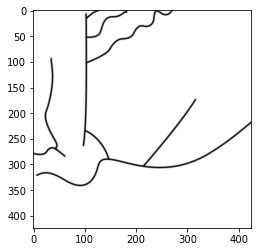

In [12]:
#checking data is in the correct order through testing some samples
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(target_img[87],cmap = 'gray')

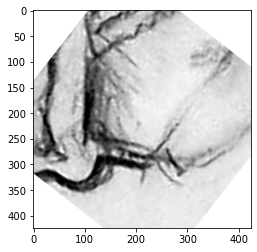

In [13]:
plt.imshow(input_img[87],cmap = 'gray')


In [14]:
#to measure time
import time

class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

time_callback = TimeHistory()
        
callbacks =  [time_callback]         

In [15]:
#check point callback
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("Keras_7by7_checkpoint.h5",
                             mointor = "loss",
                             mode = "min",
                             save_best_only = True,
                             verbose = 1)

callbacks =  [time_callback, checkpoint] 

In [ ]:
#training model
history = model.fit(input_img[:,:,:,:], target_img[:,:,:,:],
                            batch_size=8, #8 in the model
                            callbacks = callbacks,
                          epochs=200)

Train on 3267 samples, validate on 364 samples
Epoch 1/200
INFO:tensorflow:batch_all_reduce: 164 all-reduces with algorithm = hierarchical_copy, num_packs = 1, agg_small_grads_max_bytes = 0 and agg_small_grads_max_group = 10
3264/3267 [============================>.] - ETA: 0s - loss: 0.7370 - accuracy: 0.2395 - precision_m: 0.9910 - recall_m: 0.2501 - f1_m: 0.3907
Epoch 00001: val_loss improved from inf to 0.73148, saving model to Keras_manga_regloss_7by7_checkpoint.h5
3267/3267 [==============================] - 200s 61ms/sample - loss: 0.7369 - accuracy: 0.2396 - precision_m: 0.9910 - recall_m: 0.2504 - f1_m: 0.3911 - val_loss: 0.7315 - val_accuracy: 0.2858 - val_precision_m: 0.9870 - val_recall_m: 0.3024 - val_f1_m: 0.4470
Epoch 2/200
3264/3267 [============================>.] - ETA: 0s - loss: 0.7083 - accuracy: 0.3309 - precision_m: 0.9932 - recall_m: 0.3437 - f1_m: 0.4981
Epoch 00002: val_loss did not improve from 0.73148
3267/3267 [==============================] - 168s 51ms/sa

Epoch 17/200
3264/3267 [============================>.] - ETA: 0s - loss: 0.6137 - accuracy: 0.6609 - precision_m: 0.9919 - recall_m: 0.6894 - f1_m: 0.8113
Epoch 00017: val_loss improved from 0.65636 to 0.65263, saving model to Keras_manga_regloss_7by7_checkpoint.h5
3267/3267 [==============================] - 179s 55ms/sample - loss: 0.6138 - accuracy: 0.6609 - precision_m: 0.9919 - recall_m: 0.6894 - f1_m: 0.8113 - val_loss: 0.6526 - val_accuracy: 0.6013 - val_precision_m: 0.9876 - val_recall_m: 0.6420 - val_f1_m: 0.7536
Epoch 18/200
3264/3267 [============================>.] - ETA: 0s - loss: 0.6117 - accuracy: 0.6632 - precision_m: 0.9921 - recall_m: 0.6917 - f1_m: 0.8137
Epoch 00018: val_loss improved from 0.65263 to 0.64993, saving model to Keras_manga_regloss_7by7_checkpoint.h5
3267/3267 [==============================] - 177s 54ms/sample - loss: 0.6117 - accuracy: 0.6632 - precision_m: 0.9921 - recall_m: 0.6917 - f1_m: 0.8137 - val_loss: 0.6499 - val_accuracy: 0.6026 - val_prec

Epoch 50/200
3264/3267 [============================>.] - ETA: 0s - loss: 0.5395 - accuracy: 0.7217 - precision_m: 0.9911 - recall_m: 0.7571 - f1_m: 0.8582
Epoch 00050: val_loss improved from 0.57383 to 0.56970, saving model to Keras_manga_regloss_7by7_checkpoint.h5
3267/3267 [==============================] - 174s 53ms/sample - loss: 0.5395 - accuracy: 0.7217 - precision_m: 0.9911 - recall_m: 0.7570 - f1_m: 0.8582 - val_loss: 0.5697 - val_accuracy: 0.6613 - val_precision_m: 0.9849 - val_recall_m: 0.7116 - val_f1_m: 0.8076
Epoch 51/200
3264/3267 [============================>.] - ETA: 0s - loss: 0.5375 - accuracy: 0.7246 - precision_m: 0.9910 - recall_m: 0.7602 - f1_m: 0.8602
Epoch 00051: val_loss did not improve from 0.56970
3267/3267 [==============================] - 173s 53ms/sample - loss: 0.5375 - accuracy: 0.7246 - precision_m: 0.9910 - recall_m: 0.7602 - f1_m: 0.8602 - val_loss: 0.5767 - val_accuracy: 0.6578 - val_precision_m: 0.9856 - val_recall_m: 0.7062 - val_f1_m: 0.8034
Ep

3264/3267 [============================>.] - ETA: 0s - loss: 0.4805 - accuracy: 0.7567 - precision_m: 0.9893 - recall_m: 0.8015 - f1_m: 0.8854
Epoch 00082: val_loss improved from 0.51303 to 0.51254, saving model to Keras_manga_regloss_7by7_checkpoint.h5
3267/3267 [==============================] - 172s 53ms/sample - loss: 0.4805 - accuracy: 0.7567 - precision_m: 0.9893 - recall_m: 0.8015 - f1_m: 0.8854 - val_loss: 0.5125 - val_accuracy: 0.6948 - val_precision_m: 0.9820 - val_recall_m: 0.7576 - val_f1_m: 0.8417
Epoch 83/200
3264/3267 [============================>.] - ETA: 0s - loss: 0.4788 - accuracy: 0.7576 - precision_m: 0.9893 - recall_m: 0.8024 - f1_m: 0.8860
Epoch 00083: val_loss improved from 0.51254 to 0.51069, saving model to Keras_manga_regloss_7by7_checkpoint.h5
3267/3267 [==============================] - 172s 53ms/sample - loss: 0.4788 - accuracy: 0.7575 - precision_m: 0.9893 - recall_m: 0.8023 - f1_m: 0.8859 - val_loss: 0.5107 - val_accuracy: 0.6955 - val_precision_m: 0.98

Epoch 115/200
3264/3267 [============================>.] - ETA: 0s - loss: 0.4282 - accuracy: 0.7823 - precision_m: 0.9861 - recall_m: 0.8400 - f1_m: 0.9071
Epoch 00115: val_loss improved from 0.45803 to 0.45219, saving model to Keras_manga_regloss_7by7_checkpoint.h5
3267/3267 [==============================] - 172s 53ms/sample - loss: 0.4282 - accuracy: 0.7822 - precision_m: 0.9861 - recall_m: 0.8399 - f1_m: 0.9071 - val_loss: 0.4522 - val_accuracy: 0.7241 - val_precision_m: 0.9767 - val_recall_m: 0.8067 - val_f1_m: 0.8750
Epoch 116/200
3264/3267 [============================>.] - ETA: 0s - loss: 0.4269 - accuracy: 0.7830 - precision_m: 0.9859 - recall_m: 0.8409 - f1_m: 0.9076
Epoch 00116: val_loss improved from 0.45219 to 0.45188, saving model to Keras_manga_regloss_7by7_checkpoint.h5
3267/3267 [==============================] - 173s 53ms/sample - loss: 0.4269 - accuracy: 0.7830 - precision_m: 0.9859 - recall_m: 0.8409 - f1_m: 0.9076 - val_loss: 0.4519 - val_accuracy: 0.7243 - val_pr

Epoch 131/200
3264/3267 [============================>.] - ETA: 0s - loss: 0.4046 - accuracy: 0.7937 - precision_m: 0.9836 - recall_m: 0.8587 - f1_m: 0.9169
Epoch 00131: val_loss did not improve from 0.42274
3267/3267 [==============================] - 171s 52ms/sample - loss: 0.4046 - accuracy: 0.7937 - precision_m: 0.9836 - recall_m: 0.8587 - f1_m: 0.9169 - val_loss: 0.4241 - val_accuracy: 0.7380 - val_precision_m: 0.9728 - val_recall_m: 0.8322 - val_f1_m: 0.8905
Epoch 132/200
3264/3267 [============================>.] - ETA: 0s - loss: 0.4032 - accuracy: 0.7942 - precision_m: 0.9832 - recall_m: 0.8602 - f1_m: 0.9175
Epoch 00132: val_loss did not improve from 0.42274
3267/3267 [==============================] - 172s 53ms/sample - loss: 0.4032 - accuracy: 0.7942 - precision_m: 0.9832 - recall_m: 0.8602 - f1_m: 0.9175 - val_loss: 0.4228 - val_accuracy: 0.7387 - val_precision_m: 0.9725 - val_recall_m: 0.8337 - val_f1_m: 0.8912
Epoch 133/200
3264/3267 [============================>.] - E

Epoch 148/200
3264/3267 [============================>.] - ETA: 0s - loss: 0.3807 - accuracy: 0.8042 - precision_m: 0.9797 - recall_m: 0.8780 - f1_m: 0.9260
Epoch 00148: val_loss did not improve from 0.39778
3267/3267 [==============================] - 172s 53ms/sample - loss: 0.3807 - accuracy: 0.8042 - precision_m: 0.9797 - recall_m: 0.8780 - f1_m: 0.9260 - val_loss: 0.3980 - val_accuracy: 0.7500 - val_precision_m: 0.9684 - val_recall_m: 0.8558 - val_f1_m: 0.9036
Epoch 149/200
3264/3267 [============================>.] - ETA: 0s - loss: 0.3793 - accuracy: 0.8049 - precision_m: 0.9794 - recall_m: 0.8792 - f1_m: 0.9266
Epoch 00149: val_loss improved from 0.39778 to 0.39421, saving model to Keras_manga_regloss_7by7_checkpoint.h5
3267/3267 [==============================] - 172s 53ms/sample - loss: 0.3793 - accuracy: 0.8049 - precision_m: 0.9793 - recall_m: 0.8792 - f1_m: 0.9265 - val_loss: 0.3942 - val_accuracy: 0.7522 - val_precision_m: 0.9681 - val_recall_m: 0.8597 - val_f1_m: 0.9064


3264/3267 [============================>.] - ETA: 0s - loss: 0.3592 - accuracy: 0.8156 - precision_m: 0.9750 - recall_m: 0.8983 - f1_m: 0.9351
Epoch 00164: val_loss improved from 0.37467 to 0.37271, saving model to Keras_manga_regloss_7by7_checkpoint.h5
3267/3267 [==============================] - 172s 53ms/sample - loss: 0.3592 - accuracy: 0.8156 - precision_m: 0.9750 - recall_m: 0.8983 - f1_m: 0.9350 - val_loss: 0.3727 - val_accuracy: 0.7635 - val_precision_m: 0.9640 - val_recall_m: 0.8815 - val_f1_m: 0.9192
Epoch 165/200
3264/3267 [============================>.] - ETA: 0s - loss: 0.3577 - accuracy: 0.8169 - precision_m: 0.9746 - recall_m: 0.9005 - f1_m: 0.9360
Epoch 00165: val_loss improved from 0.37271 to 0.36312, saving model to Keras_manga_regloss_7by7_checkpoint.h5
3267/3267 [==============================] - 172s 53ms/sample - loss: 0.3577 - accuracy: 0.8169 - precision_m: 0.9746 - recall_m: 0.9005 - f1_m: 0.9360 - val_loss: 0.3631 - val_accuracy: 0.7705 - val_precision_m: 0.9

3267/3267 [==============================] - 173s 53ms/sample - loss: 0.3416 - accuracy: 0.8201 - precision_m: 0.9742 - recall_m: 0.9071 - f1_m: 0.9394 - val_loss: 0.3437 - val_accuracy: 0.7763 - val_precision_m: 0.9632 - val_recall_m: 0.9045 - val_f1_m: 0.9328
Epoch 180/200
3264/3267 [============================>.] - ETA: 0s - loss: 0.3408 - accuracy: 0.8202 - precision_m: 0.9743 - recall_m: 0.9072 - f1_m: 0.9395
Epoch 00180: val_loss improved from 0.34371 to 0.34293, saving model to Keras_manga_regloss_7by7_checkpoint.h5
3267/3267 [==============================] - 172s 53ms/sample - loss: 0.3408 - accuracy: 0.8202 - precision_m: 0.9743 - recall_m: 0.9072 - f1_m: 0.9395 - val_loss: 0.3429 - val_accuracy: 0.7763 - val_precision_m: 0.9633 - val_recall_m: 0.9048 - val_f1_m: 0.9330
Epoch 181/200
3264/3267 [============================>.] - ETA: 0s - loss: 0.3401 - accuracy: 0.8202 - precision_m: 0.9743 - recall_m: 0.9074 - f1_m: 0.9396
Epoch 00181: val_loss improved from 0.34293 to 0.34

Epoch 195/200
3264/3267 [============================>.] - ETA: 0s - loss: 0.3322 - accuracy: 0.8208 - precision_m: 0.9749 - recall_m: 0.9092 - f1_m: 0.9409
Epoch 00195: val_loss improved from 0.33497 to 0.33451, saving model to Keras_manga_regloss_7by7_checkpoint.h5
3267/3267 [==============================] - 173s 53ms/sample - loss: 0.3322 - accuracy: 0.8208 - precision_m: 0.9748 - recall_m: 0.9092 - f1_m: 0.9409 - val_loss: 0.3345 - val_accuracy: 0.7772 - val_precision_m: 0.9644 - val_recall_m: 0.9077 - val_f1_m: 0.9351
Epoch 196/200
3264/3267 [============================>.] - ETA: 0s - loss: 0.3317 - accuracy: 0.8209 - precision_m: 0.9748 - recall_m: 0.9094 - f1_m: 0.9409
Epoch 00196: val_loss improved from 0.33451 to 0.33408, saving model to Keras_manga_regloss_7by7_checkpoint.h5
3267/3267 [==============================] - 174s 53ms/sample - loss: 0.3317 - accuracy: 0.8209 - precision_m: 0.9748 - recall_m: 0.9094 - f1_m: 0.9409 - val_loss: 0.3341 - val_accuracy: 0.7773 - val_pr

In [ ]:
#saving model
model.save("7by7filters.h5")

In [ ]:
#saving history
np.save('7by7filters.npy',history.history) 

In [ ]:
#plot history
history_dict = history.history

train_loss = history_dict['loss']#Training loss
#val_loss = history_dict['val_loss']#Validation loss
epochs = range(1,len(train_loss)+1)#Number of epochs

line1 = plt.plot(epochs, train_loss, label = 'Training Loss')
#line2 = plt.plot(epochs, val_loss, label = 'Validation Loss')

plt.setp(line1,linewidth = 2.0, marker = '+', markersize = 10.0)
#plt.setp(line1,linewidth = 2.0, marker = '4', markersize = 10.0)

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.grid(True)
plt.legend()

plt.show()